In [1]:
using RDatasets
using Plots

In [2]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [3]:
dat = [x for x in zip(iris[51:150, 1], iris[51:150, 3], iris[51:150, 5])];

In [4]:
dat

100-element Array{Tuple{Float64,Float64,CategoricalArrays.CategoricalValue{String,UInt8}},1}:
 (7.0, 4.7, "versicolor")
 (6.4, 4.5, "versicolor")
 (6.9, 4.9, "versicolor")
 (5.5, 4.0, "versicolor")
 (6.5, 4.6, "versicolor")
 (5.7, 4.5, "versicolor")
 (6.3, 4.7, "versicolor")
 (4.9, 3.3, "versicolor")
 (6.6, 4.6, "versicolor")
 (5.2, 3.9, "versicolor")
 (5.0, 3.5, "versicolor")
 (5.9, 4.2, "versicolor")
 (6.0, 4.0, "versicolor")
 ⋮                       
 (6.0, 4.8, "virginica") 
 (6.9, 5.4, "virginica") 
 (6.7, 5.6, "virginica") 
 (6.9, 5.1, "virginica") 
 (5.8, 5.1, "virginica") 
 (6.8, 5.9, "virginica") 
 (6.7, 5.7, "virginica") 
 (6.7, 5.2, "virginica") 
 (6.3, 5.0, "virginica") 
 (6.5, 5.2, "virginica") 
 (6.2, 5.4, "virginica") 
 (5.9, 5.1, "virginica") 

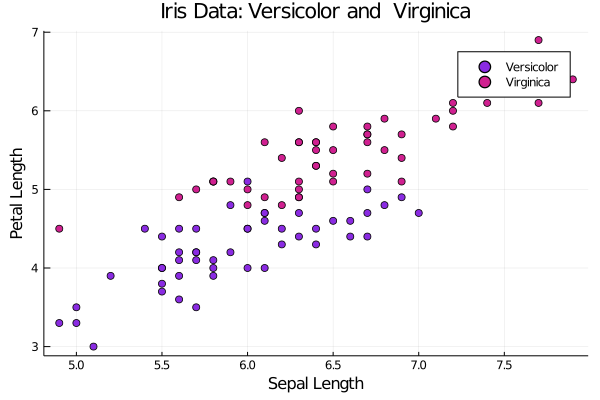

In [5]:
scatter([x[1:2] for x in dat if x[3] == "versicolor"], 
            label = "Versicolor", 
            color = "blueviolet",
            xaxis = "Sepal Length",
            yaxis = "Petal Length",
            title = "Iris Data: Versicolor and  Virginica")

scatter!([x[1:2] for x in dat if x[3] == "virginica"], 
            label = "Virginica",
            color = "violetred")


In [6]:
X, Y = [[x[1], x[2]] for x in dat], [x[3] == "versicolor" ? 1 : -1 for x in dat]

(Array{Float64,1}[[7.0, 4.7], [6.4, 4.5], [6.9, 4.9], [5.5, 4.0], [6.5, 4.6], [5.7, 4.5], [6.3, 4.7], [4.9, 3.3], [6.6, 4.6], [5.2, 3.9]  …  [6.7, 5.6], [6.9, 5.1], [5.8, 5.1], [6.8, 5.9], [6.7, 5.7], [6.7, 5.2], [6.3, 5.0], [6.5, 5.2], [6.2, 5.4], [5.9, 5.1]], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
function s(weights, x)
    x̄ = [1.0, x[1], x[2]]
    return weights'x̄ > 0 ? 1 : -1
end

function perceptron_update_rule(weights, x, y)
    if s(weights, x) != y
        weights += y*[1.0, x[1], x[2]]
    end
    
    return weights
end


perceptron_update_rule (generic function with 1 method)

In [8]:

function errors(weights, X, Y)
    return  sum([Int(s(weights, X[i]) != Y[i]) for i = 1:length(X)])
end

errors (generic function with 1 method)

In [9]:
function PLA(X, Y; epochs = 1000)
    w = randn(3)
    
    counter = 1
    while counter < epochs
        for i = 1:length(X)
            w = perceptron_update_rule(w, X[i], Y[i])
        end
        counter += 1
    end
        
    return w
end

PLA (generic function with 1 method)

In [10]:
w = PLA(X, Y; epochs = 1000)

3-element Array{Float64,1}:
  221.9245421698136 
  127.33361789234222
 -220.85129200228292

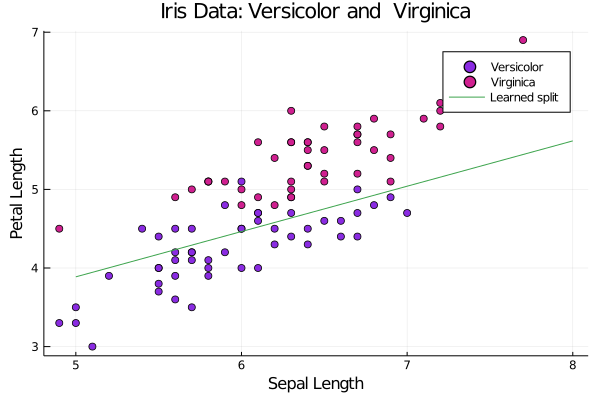

In [11]:
plot!([(x, (-w[2]*x - w[1])/w[3]) for x = 5:8],
        label = "Learned split")

In [13]:
function predictor(weights, x)
    return s(weights, x) == 1 ? "versicolor" : "virginica"
end

predictor (generic function with 1 method)

In [14]:
iris.Species[55]

CategoricalArrays.CategoricalValue{String,UInt8} "versicolor"

In [15]:
predictor(w, (iris.SepalLength[121], iris.PetalLength[121]))

"virginica"

In [16]:
k = rand([51, 150])
println("The true label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.SepalLength[k], iris.PetalLength[k])))

The true label is: versicolor
The predicted label is: versicolor
